## Multiclass Classification

### Necessary Packages

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from collections import Counter
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import seaborn as sns
import gensim
from gensim import corpora
from nltk.tokenize import word_tokenize
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from transformers import RobertaTokenizer, TFRobertaModel
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from transformers import RobertaTokenizer, TFRobertaModel


### Dataset Loading

In [17]:
data = pd.read_csv('train.csv')

data.head()

,tweets,class
0,Be aware dirty step to get money #staylight ...,figurative
1,#sarcasm for #people who don't understand #diy...,figurative
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative
3,@wilw Why do I get the feeling you like games?...,figurative
4,-@TeacherArthurG @rweingarten You probably jus...,figurative


In [18]:
sample_data = data.groupby('class').apply(lambda x: x.head(5)).reset_index(drop=True)
sample_data

,tweets,class
0,Be aware dirty step to get money #staylight ...,figurative
1,#sarcasm for #people who don't understand #diy...,figurative
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative
3,@wilw Why do I get the feeling you like games?...,figurative
4,-@TeacherArthurG @rweingarten You probably jus...,figurative
5,"Fav moment in Sepp Blatter vid (0:20): ""We hav...",irony
6,Just found this while walking my human.... #ir...,irony
7,'Disrespected the wife of Prophet' - pseudo li...,irony
8,Do you know that super yeay satisfying feeling...,irony
9,If you're going to call someone ignorant and s...,irony


In [5]:
pd.set_option('display.max_colwidth', None)


In [6]:
sample_data

,tweets,class
0,Be aware dirty step to get money #staylight #staywhite #sarcastic #moralneeded @… https://t.co/Oj6BdyX3WG,figurative
1,#sarcasm for #people who don't understand #diy #artattack http://t.co/rtyYmuDVUS,figurative
2,@IminworkJeremy @medsingle #DailyMail readers being sensible as always #shocker #sarcastic #dailyfail #inHuntspocket #theyhatethenhs,figurative
3,@wilw Why do I get the feeling you like games? #sarcasm,figurative
4,-@TeacherArthurG @rweingarten You probably just missed the text. #sarcastic,figurative
5,"Fav moment in Sepp Blatter vid (0:20): ""We have to clean here first. This has nothing to do with football."" https://t.co/4dhWOK9x2e #irony",irony
6,Just found this while walking my human.... #irony #Detroit http://t.co/ooZzRLFL19,irony
7,'Disrespected the wife of Prophet' - pseudo libtards playing the blasphemy card #Irony https://t.co/WmrEoDfdVe,irony
8,Do you know that super yeay satisfying feeling when you get to say exactly what you wanted to say in just 140 characters #life #goals #irony,irony
9,"If you're going to call someone ignorant and stupid on social media, can you at least spell it right? #irony",irony


In [19]:
# Checking for missing values
missing_values = data.isnull().sum()

# Display missing values
missing_values


tweets    0
class     0
dtype: int64

In [20]:
# Analyzing the distribution of the classes
class_distribution = data['class'].value_counts()

# Display class distribution
class_distribution


class
figurative    21238
irony         20894
sarcasm       20681
regular       18595
Name: count, dtype: int64

In [21]:
# Calculating the length of each tweet
data['tweet_length'] = data['tweets'].apply(len)

# Summary statistics for tweet lengths
tweet_length_stats = data['tweet_length'].describe()

# Displaying summary statistics for tweet lengths
tweet_length_stats


count    81408.000000
mean       102.455066
std         30.725400
min          6.000000
25%         78.000000
50%        107.000000
75%        132.000000
max        161.000000
Name: tweet_length, dtype: float64

### Preprocessing

In [24]:

# Function to preprocess the text
def preprocess_text(text):
    # Remove URLs, mentions, hashtags, and special characters
    text = re.sub(r'http\S+|www\S+|@\w+|#\w+|[^A-Za-z0-9\s]', '', text)
    text = text.lower()
    return text

# Applying the preprocessing function to the tweets
data['clean_tweets'] = data['tweets'].apply(preprocess_text)

data['clean_tweets']


0                be aware  dirty step to get money        
1                              for  who dont understand   
2                    readers being sensible as always     
3                 why do i get the feeling you like games 
4                       you probably just missed the text 
                               ...                        
81403                    photo image via we heart it      
81404    i never knewi better put this out to the unive...
81405    hey just wanted to say thanks  puberty for let...
81406    im sure coverage like the fox news special the...
81407           at u13 i wont believe it until i see it p 
Name: clean_tweets, Length: 81408, dtype: object

## EDA

In [26]:
# Combining all tweets into a single string
all_words = ' '.join(data['clean_tweets'])

# Generating a word frequency distribution
word_freq = Counter(all_words.split())

word_freq

Counter({'be': 5360,
         'aware': 43,
         'dirty': 64,
         'step': 97,
         'to': 24983,
         'get': 2751,
         'money': 558,
         'for': 11151,
         'who': 2822,
         'dont': 2716,
         'understand': 276,
         'readers': 26,
         'being': 1661,
         'sensible': 12,
         'as': 2875,
         'always': 844,
         'why': 1578,
         'do': 2473,
         'i': 16287,
         'the': 34371,
         'feeling': 245,
         'you': 10644,
         'like': 3313,
         'games': 237,
         'probably': 292,
         'just': 4565,
         'missed': 228,
         'text': 125,
         'tune': 37,
         'in': 13489,
         'nigezie': 2,
         'and': 13005,
         'treated': 47,
         'rachel': 15,
         'plattens': 2,
         'fight': 230,
         'song': 351,
         'move': 187,
         'mtv': 26,
         'reminisce': 3,
         'amp': 3173,
         'olamides': 2,
         'local': 137,
         'rapper

In [27]:
# Displaying the 10 most common words
common_words = word_freq.most_common(10)
common_words

[('the', 34371),
 ('to', 24983),
 ('a', 22179),
 ('i', 16287),
 ('of', 15094),
 ('is', 14129),
 ('in', 13489),
 ('and', 13005),
 ('for', 11151),
 ('you', 10644)]

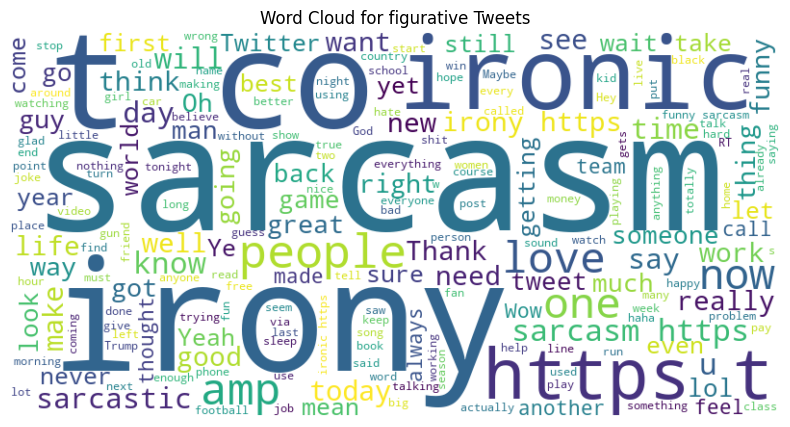

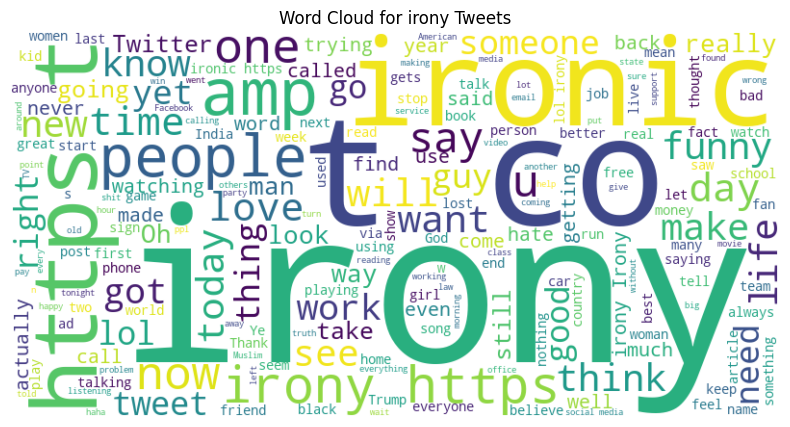

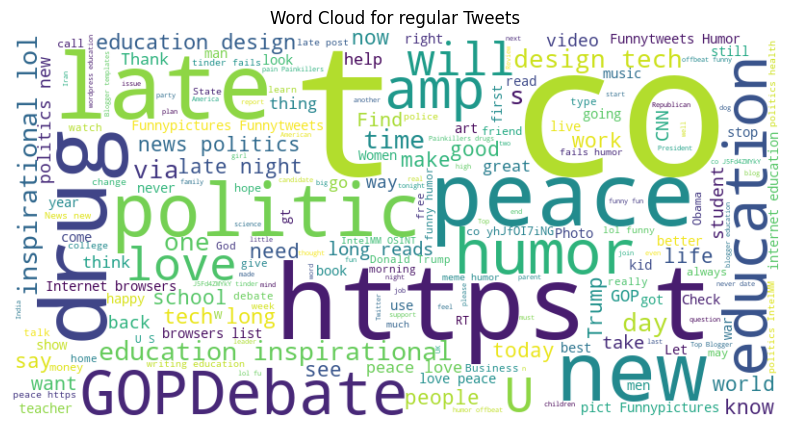

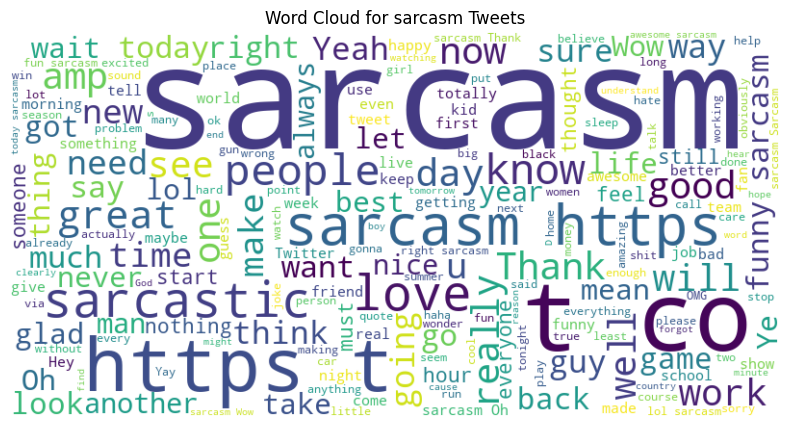

In [28]:


# Function to generate and display word clouds for each class
def generate_word_clouds(data):
    classes = data['class'].unique()
    for category in classes:
        text = ' '.join(data[data['class'] == category]['tweets'])
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for {category} Tweets')
        plt.axis('off')
        plt.show()

# Generating word clouds for each category
generate_word_clouds(data)


In [12]:
# Function to generate word frequency for a specific class
def get_word_freq_by_class(data, class_name):
    class_data = data[data['class'] == class_name]
    all_words_class = ' '.join(class_data['clean_tweets'])
    word_freq_class = Counter(all_words_class.split())
    return word_freq_class.most_common(10)

# Getting the most common words for each class
most_common_words_fig = get_word_freq_by_class(data, 'figurative')
most_common_words_irony = get_word_freq_by_class(data, 'irony')
most_common_words_sarcasm = get_word_freq_by_class(data, 'sarcasm')
most_common_words_regular = get_word_freq_by_class(data, 'regular')

most_common_words = {
    "Figurative": most_common_words_fig,
    "Irony": most_common_words_irony,
    "Sarcasm": most_common_words_sarcasm,
    "Regular": most_common_words_regular
}

most_common_words


{'Figurative': [('the', 9836),
  ('to', 6923),
  ('a', 6434),
  ('i', 4999),
  ('is', 4075),
  ('of', 4056),
  ('and', 3578),
  ('in', 3573),
  ('you', 3013),
  ('for', 2963)],
 'Irony': [('the', 10925),
  ('to', 7405),
  ('a', 6976),
  ('of', 4698),
  ('i', 4409),
  ('is', 4230),
  ('in', 4211),
  ('and', 3940),
  ('on', 3310),
  ('for', 2901)],
 'Sarcasm': [('the', 8101),
  ('to', 6293),
  ('a', 5574),
  ('i', 5277),
  ('is', 3630),
  ('of', 3235),
  ('you', 3208),
  ('and', 3145),
  ('for', 2899),
  ('in', 2867)],
 'Regular': [('the', 5509),
  ('to', 4362),
  ('a', 3195),
  ('of', 3105),
  ('in', 2838),
  ('for', 2388),
  ('and', 2342),
  ('is', 2194),
  ('on', 1889),
  ('you', 1649)]}

## N Gram Analysis

In [13]:

# Function to get top N n-grams
def get_top_ngrams(corpus, n=None, ngram_range=(2, 2)):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get top 10 bigrams and trigrams
top_bigrams = get_top_ngrams(data['clean_tweets'], n=10, ngram_range=(2, 2))
top_trigrams = get_top_ngrams(data['clean_tweets'], n=10, ngram_range=(3, 3))

top_bigrams, top_trigrams


([('im sure', 291),
  ('dont know', 255),
  ('social media', 248),
  ('just love', 230),
  ('looks like', 212),
  ('donald trump', 184),
  ('dont think', 146),
  ('internet browsers', 146),
  ('browsers list', 146),
  ('good thing', 137)],
 [('internet browsers list', 146),
  ('10 types men', 99),
  ('types men date', 98),
  ('web design hoting', 74),
  ('design hoting rea', 72),
  ('android design reads', 72),
  ('employer code reads', 68),
  ('guitar pick handmade', 45),
  ('funny pictures day', 42),
  ('dont just love', 35)])

In [29]:
# List of example words to compare
example_words = ['love', 'hate', 'great', 'terrible']

# Function to get word frequency for specific words by class
def get_word_freq_by_class_for_words(data, words):
    word_freq_by_class = {}
    for word in words:
        freq = data[data['clean_tweets'].str.contains(word)]['class'].value_counts()
        word_freq_by_class[word] = freq
    return word_freq_by_class

# Geting word frequency for example words by class
word_freq_by_class = get_word_freq_by_class_for_words(data, example_words)

word_freq_by_class


{'love': class
 sarcasm       1267
 figurative     890
 irony          520
 regular        367
 Name: count, dtype: int64,
 'hate': class
 irony         272
 figurative    224
 sarcasm       180
 regular        56
 Name: count, dtype: int64,
 'great': class
 sarcasm       886
 figurative    580
 regular       240
 irony         213
 Name: count, dtype: int64,
 'terrible': class
 sarcasm       59
 figurative    38
 irony         19
 regular       19
 Name: count, dtype: int64}

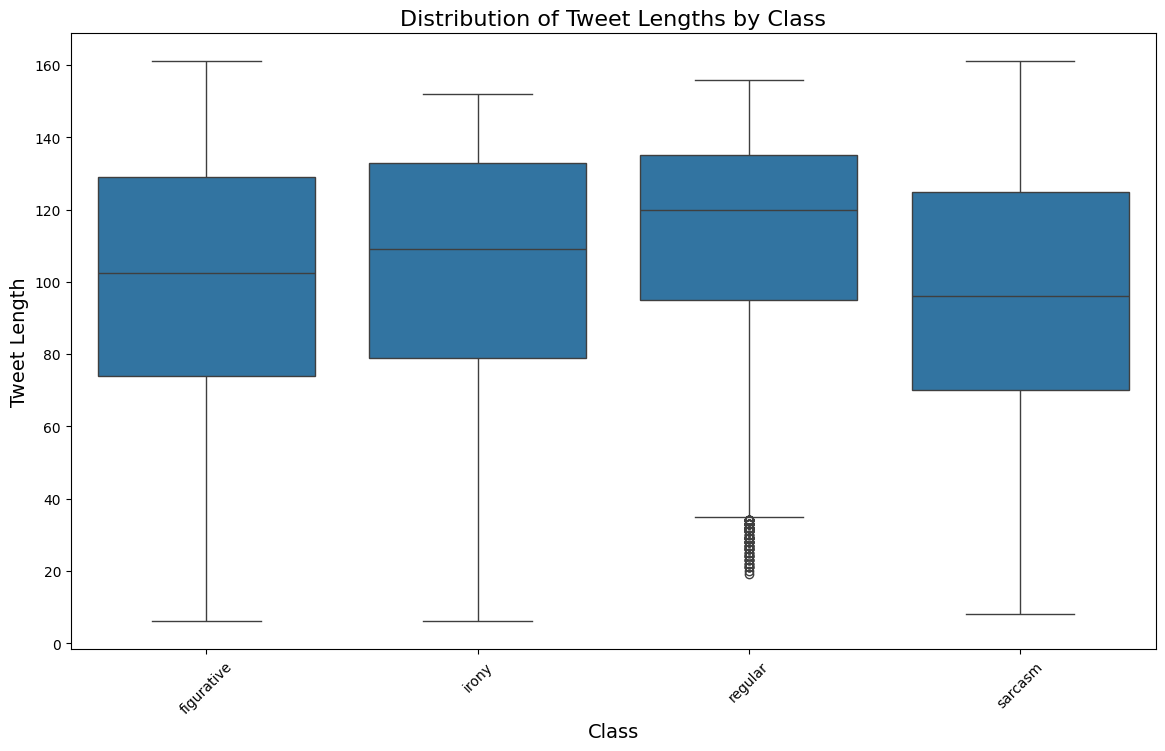

In [30]:
# Ploting tweet length distribution by class
plt.figure(figsize=(14, 8))
sns.boxplot(x='class', y='tweet_length', data=data)
plt.title('Distribution of Tweet Lengths by Class', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Tweet Length', fontsize=14)
plt.xticks(rotation=45)
plt.show()


In [32]:
# Loading a smaller subset of the training data for quicker iterations
train_data = pd.read_csv('train.csv')

# Load the test data
test_data = pd.read_csv('test.csv')

# Checking for missing values
missing_values_train = train_data.isnull().sum()
missing_values_test = test_data.isnull().sum()
print("Missing values in training data:\n", missing_values_train)
print("Missing values in test data:\n", missing_values_test)


Missing values in training data:
 tweets    0
class     0
dtype: int64
Missing values in test data:
 tweets    2
class     9
dtype: int64


Class distribution in training data:
 class
figurative    21238
irony         20894
sarcasm       20681
regular       18595
Name: count, dtype: int64


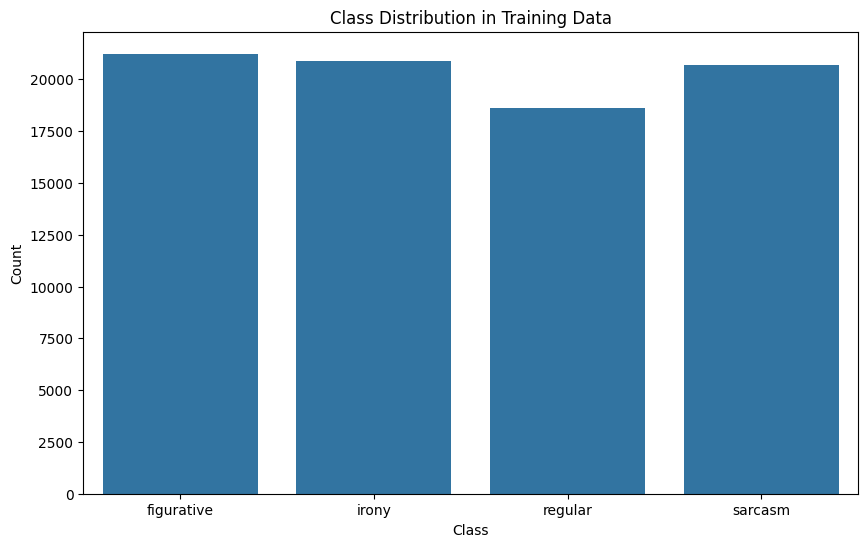

In [33]:
# Analyzing the distribution of the classes
class_distribution = train_data['class'].value_counts()
print("Class distribution in training data:\n", class_distribution)

# Plotting class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=train_data)
plt.title('Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

## LDA analysis

Tweet length stats:
 count    81408.000000
mean       102.455066
std         30.725400
min          6.000000
25%         78.000000
50%        107.000000
75%        132.000000
max        161.000000
Name: tweet_length, dtype: float64


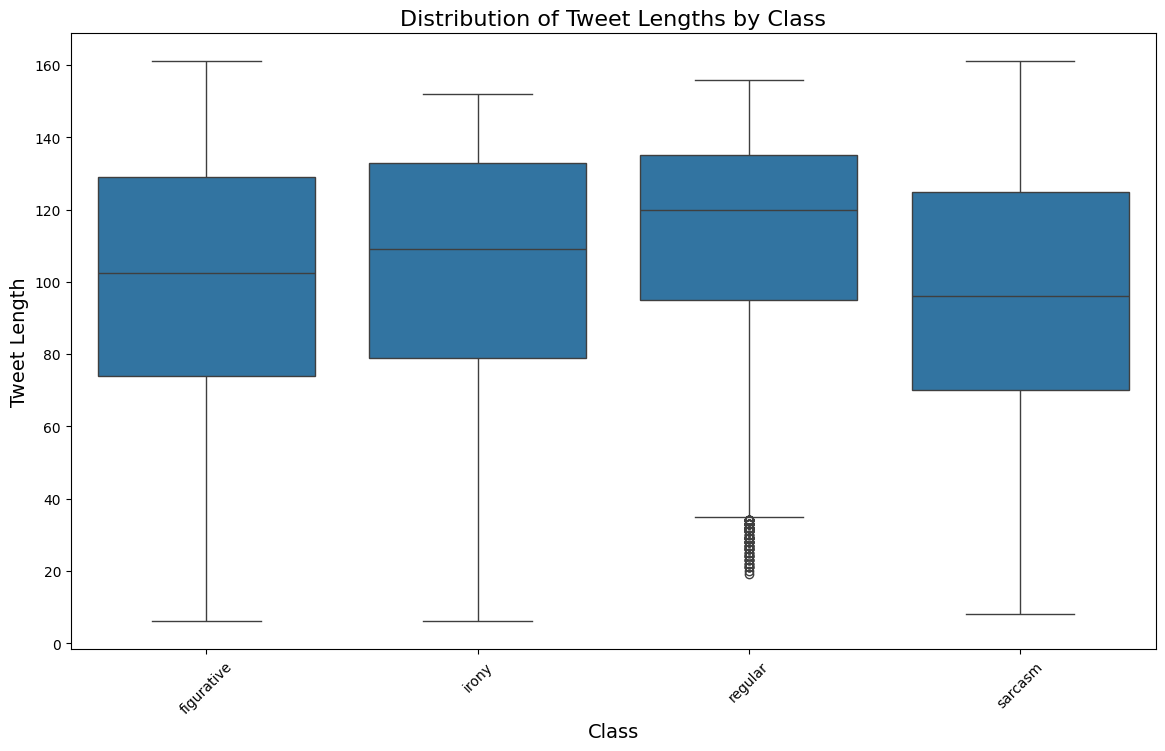

In [23]:
# Calculate the length of each tweet
train_data['tweet_length'] = train_data['tweets'].apply(len)
tweet_length_stats = train_data['tweet_length'].describe()
print("Tweet length stats:\n", tweet_length_stats)

# Plot tweet length distribution by class
plt.figure(figsize=(14, 8))
sns.boxplot(x='class', y='tweet_length', data=train_data)
plt.title('Distribution of Tweet Lengths by Class', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Tweet Length', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [34]:
# Preprocessing the text
def preprocess_text(text):
    if isinstance(text, str):
        text = re.sub(r'http\S+|www\S+|@\w+|#\w+|[^A-Za-z0-9\s]', '', text)
        text = text.lower()
    else:
        text = ""
    return text
train_data['clean_tweets'] = train_data['tweets'].apply(preprocess_text)
test_data['clean_tweets'] = test_data['tweets'].apply(preprocess_text)

# Combining all tweets into a single string for word frequency
all_words = ' '.join(train_data['clean_tweets'])
word_freq = Counter(all_words.split())

# Displaying the 10 most common words
common_words = word_freq.most_common(10)
print("Most common words:\n", common_words)

Most common words:
 [('the', 34371), ('to', 24983), ('a', 22179), ('i', 16287), ('of', 15094), ('is', 14129), ('in', 13489), ('and', 13005), ('for', 11151), ('you', 10644)]


In [36]:
# Sample 10% of the dataset
train_data_sampled = train_data.sample(frac=0.1, random_state=42)
test_data_sampled = test_data.sample(frac=0.1, random_state=42)

# Ensuring the target labels are encoded correctly
label_mapping = {'sarcasm': 0, 'regular': 1, 'irony': 2, 'figurative': 3}
train_data_sampled['class'] = train_data_sampled['class'].map(label_mapping)
test_data_sampled['class'] = test_data_sampled['class'].map(label_mapping)

# Defining X and y
X_train = train_data_sampled['clean_tweets']
y_train = train_data_sampled['class']
X_test = test_data_sampled['clean_tweets']
y_test = test_data_sampled['class']


In [37]:
def preprocess_text(text):
    if isinstance(text, str):
        text = re.sub(r'http\S+|www\S+|@\w+|#\w+|[^A-Za-z0-9\s]', '', text)
        text = text.lower()
    else:
        text = ""
    return text

# Apply preprocessing
X_train = X_train.apply(preprocess_text)
X_test = X_test.apply(preprocess_text)

# Ensuring no missing values in y_test
y_test = y_test.dropna()
X_test = X_test.loc[y_test.index]


## Logistic Regression Model

In [38]:
from sklearn.linear_model import LogisticRegression

# Defining the pipeline with increased max_iter
pipeline_lr = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=1000)),
    ('clf', LogisticRegression(max_iter=200))
])

# Train the model
pipeline_lr.fit(X_train, y_train)

# Making the predictions
y_pred_lr = pipeline_lr.predict(X_test)

# Evaluate the model
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr, target_names=['sarcasm', 'regular', 'irony', 'figurative']))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

     sarcasm       0.43      0.48      0.45       197
     regular       0.61      0.55      0.58       203
       irony       0.35      0.46      0.40       188
  figurative       0.29      0.21      0.25       225

    accuracy                           0.42       813
   macro avg       0.42      0.42      0.42       813
weighted avg       0.42      0.42      0.41       813



## SVM Model

In [27]:
from sklearn.svm import SVC

# Define the pipeline
pipeline_svm = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=1000)),
    ('clf', SVC(probability=True))
])

# Train the model
pipeline_svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = pipeline_svm.predict(X_test)

# Evaluate the model
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm, target_names=['sarcasm', 'regular', 'irony', 'figurative']))


SVM Classification Report:
               precision    recall  f1-score   support

     sarcasm       0.42      0.52      0.46       197
     regular       0.66      0.52      0.58       203
       irony       0.36      0.48      0.41       188
  figurative       0.25      0.17      0.20       225

    accuracy                           0.41       813
   macro avg       0.42      0.42      0.41       813
weighted avg       0.42      0.41      0.41       813



## Random Forest Model

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Define the pipeline
pipeline_rf = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=1000)),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
pipeline_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = pipeline_rf.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=['sarcasm', 'regular', 'irony', 'figurative']))


Random Forest Classification Report:
               precision    recall  f1-score   support

     sarcasm       0.37      0.39      0.38       197
     regular       0.55      0.54      0.54       203
       irony       0.33      0.46      0.38       188
  figurative       0.28      0.18      0.22       225

    accuracy                           0.38       813
   macro avg       0.38      0.39      0.38       813
weighted avg       0.38      0.38      0.38       813



## LSTM Model

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
max_length = 50
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length)

# Ensure y_train and y_test are numpy arrays
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()


In [30]:
# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=100, input_length=max_length))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(4, activation='softmax'))  # Four units for four classes

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
y_pred_lstm = model.predict(X_test_padded)
y_pred_lstm_classes = tf.argmax(y_pred_lstm, axis=1).numpy()
print("LSTM Classification Report:\n", classification_report(y_test, y_pred_lstm_classes, target_names=['sarcasm', 'regular', 'irony', 'figurative']))


Epoch 1/5
115/115 [==============================] - 44s 336ms/step - loss: 1.3370 - accuracy: 0.3373 - val_loss: 1.2853 - val_accuracy: 0.3975
Epoch 2/5
115/115 [==============================] - 37s 319ms/step - loss: 1.1615 - accuracy: 0.4821 - val_loss: 1.2059 - val_accuracy: 0.4454
Epoch 3/5
115/115 [==============================] - 37s 321ms/step - loss: 0.9840 - accuracy: 0.5740 - val_loss: 1.2633 - val_accuracy: 0.4356
Epoch 4/5
115/115 [==============================] - 36s 311ms/step - loss: 0.8393 - accuracy: 0.6488 - val_loss: 1.3816 - val_accuracy: 0.4160
Epoch 5/5
26/26 [==============================] - 1s 31ms/step
LSTM Classification Report:
               precision    recall  f1-score   support

     sarcasm       0.39      0.42      0.40       197
     regular       0.56      0.57      0.56       203
       irony       0.35      0.32      0.34       188
  figurative       0.29      0.28      0.29       225

    accuracy                           0.40       813
   ma

## BERT Model

In [34]:
max_length = 50  # Define max length consistently

# Tokenize the text data for BERT
X_train_bert = bert_tokenizer(X_train.tolist(), max_length=max_length, padding='max_length', truncation=True, return_tensors='tf')
X_test_bert = bert_tokenizer(X_test.tolist(), max_length=max_length, padding='max_length', truncation=True, return_tensors='tf')


In [35]:
import tensorflow as tf

# Define the BERT-based model
input_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='attention_mask')

bert_model = TFBertModel.from_pretrained('bert-base-uncased')
bert_output = bert_model(input_ids, attention_mask=attention_mask)[0]
cls_token = bert_output[:, 0, :]

output = tf.keras.layers.Dense(4, activation='softmax')(cls_token)  # Four units for four classes
bert_classifier = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

bert_classifier.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), 
                        loss='sparse_categorical_crossentropy', 
                        metrics=['accuracy'])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [36]:
# Training the model
history = bert_classifier.fit({'input_ids': X_train_bert['input_ids'], 'attention_mask': X_train_bert['attention_mask']}, 
                              y_train, epochs=3, batch_size=32, validation_split=0.1)

# Evaluating the model
y_pred_bert = bert_classifier.predict({'input_ids': X_test_bert['input_ids'], 'attention_mask': X_test_bert['attention_mask']})
y_pred_bert_classes = tf.argmax(y_pred_bert, axis=1).numpy()
print("BERT Classification Report:\n", classification_report(y_test, y_pred_bert_classes, target_names=['sarcasm', 'regular', 'irony', 'figurative']))

Epoch 1/3
229/229 [==============================] - 3837s 17s/step - loss: 1.2188 - accuracy: 0.4387 - val_loss: 1.1829 - val_accuracy: 0.4736
Epoch 2/3
229/229 [==============================] - 1751s 8s/step - loss: 1.0010 - accuracy: 0.5530 - val_loss: 1.1635 - val_accuracy: 0.4871
Epoch 3/3
26/26 [==============================] - 61s 2s/step
BERT Classification Report:
               precision    recall  f1-score   support

     sarcasm       0.48      0.62      0.55       197
     regular       0.76      0.60      0.67       203
       irony       0.40      0.62      0.49       188
  figurative       0.32      0.16      0.21       225

    accuracy                           0.49       813
   macro avg       0.49      0.50      0.48       813
weighted avg       0.49      0.49      0.47       813



## Roberta Model

In [43]:
# Loading the RoBERTa tokenizer
roberta_tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Tokenizing the text data
X_train_roberta = roberta_tokenizer(X_train.tolist(), max_length=max_length, padding='max_length', truncation=True, return_tensors='tf')
X_test_roberta = roberta_tokenizer(X_test.tolist(), max_length=max_length, padding='max_length', truncation=True, return_tensors='tf')

# Defining the RoBERTa-based model
input_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='attention_mask')

roberta_model = TFRobertaModel.from_pretrained('roberta-base')
roberta_output = roberta_model(input_ids, attention_mask=attention_mask)[0]
cls_token = roberta_output[:, 0, :]

output = tf.keras.layers.Dense(4, activation='softmax')(cls_token)  # Four units for four classes
roberta_classifier = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

roberta_classifier.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), 
                           loss='sparse_categorical_crossentropy', 
                           metrics=['accuracy'])

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'roberta.embeddings.position_ids', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

In [44]:
# Training the model
history = roberta_classifier.fit({'input_ids': X_train_roberta['input_ids'], 'attention_mask': X_train_roberta['attention_mask']}, 
                                 y_train, epochs=3, batch_size=32, validation_split=0.1)

# Evaluating the model
y_pred_roberta = roberta_classifier.predict({'input_ids': X_test_roberta['input_ids'], 'attention_mask': X_test_roberta['attention_mask']})
y_pred_roberta_classes = tf.argmax(y_pred_roberta, axis=1).numpy()
print("RoBERTa Classification Report:\n", classification_report(y_test, y_pred_roberta_classes, target_names=['sarcasm', 'regular', 'irony', 'figurative']))

Epoch 1/3
229/229 [==============================] - 1831s 8s/step - loss: 1.2165 - accuracy: 0.4307 - val_loss: 1.1145 - val_accuracy: 0.5141
Epoch 2/3
229/229 [==============================] - 1755s 8s/step - loss: 1.0465 - accuracy: 0.5341 - val_loss: 1.1110 - val_accuracy: 0.5080
Epoch 3/3
26/26 [==============================] - 62s 2s/step
RoBERTa Classification Report:
               precision    recall  f1-score   support

     sarcasm       0.49      0.49      0.49       197
     regular       0.69      0.75      0.72       203
       irony       0.43      0.66      0.52       188
  figurative       0.28      0.13      0.18       225

    accuracy                           0.50       813
   macro avg       0.47      0.51      0.48       813
weighted avg       0.47      0.50      0.47       813



## Entire dataset


In [65]:
# Loading the test data
test_data = pd.read_csv('test.csv')

# Updated preprocess_text function to handle non-string inputs
def preprocess_text(text):
    if isinstance(text, str):
        import re
        text = re.sub(r'http\S+|www\S+|@\w+|#\w+|[^A-Za-z0-9\s]', '', text)
        text = text.lower()
    else:
        text = ""
    return text

In [66]:
# Ensuring all tweets are strings and fill missing values
test_data['tweets'] = test_data['tweets'].astype(str).fillna('')

# Applying the preprocessing to create the clean_tweets column
test_data['clean_tweets'] = test_data['tweets'].apply(preprocess_text)

# Ensuring no NaN values in the 'class' column
test_data['class'] = test_data['class'].fillna(-1)  # Assuming -1 is not used as a valid class


In [67]:
# Filtering out invalid class labels
valid_indices = test_data['class'] != -1
test_data = test_data[valid_indices]

In [68]:
# Tokenization
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
max_length = 50

X_test_roberta = tokenizer(test_data['clean_tweets'].tolist(), max_length=max_length, padding='max_length', truncation=True, return_tensors='tf')
y_test = test_data['class'].map({'sarcasm': 0, 'regular': 1, 'irony': 2, 'figurative': 3}).values


In [33]:
# Defining the RoBERTa-based model
input_ids = Input(shape=(max_length,), dtype=tf.int32, name='input_ids')
attention_mask = Input(shape=(max_length,), dtype=tf.int32, name='attention_mask')

roberta_model = TFRobertaModel.from_pretrained('roberta-base')
roberta_output = roberta_model(input_ids, attention_mask=attention_mask)[0]
cls_token = roberta_output[:, 0, :]  # Extract the CLS token

output = Dense(4, activation='softmax')(cls_token)  # Four units for four classes
roberta_classifier = Model(inputs=[input_ids, attention_mask], outputs=output)

roberta_classifier.compile(optimizer=Adam(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

In [34]:
# Training the model
history = roberta_classifier.fit({'input_ids': X_train_roberta['input_ids'], 'attention_mask': X_train_roberta['attention_mask']}, 
                                 y_train, epochs=3, batch_size=32, validation_split=0.1)


Epoch 1/3
2290/2290 [==============================] - 22692s 10s/step - loss: 1.0705 - accuracy: 0.5014 - val_loss: 1.2988 - val_accuracy: 0.5412
Epoch 2/3
2290/2290 [==============================] - 34160s 15s/step - loss: 0.9342 - accuracy: 0.5589 - val_loss: 1.3192 - val_accuracy: 0.0937
Epoch 3/3
2290/2290 [==============================] - 24886s 11s/step - loss: 0.8376 - accuracy: 0.5974 - val_loss: 1.5302 - val_accuracy: 0.1263


In [69]:
# Converting predictions to class labels
y_pred_roberta_classes = tf.argmax(y_pred_roberta, axis=1).numpy()


In [70]:
# Ensure that y_pred_roberta_classes and y_test are aligned
valid_indices = ~pd.isnull(y_test)
y_test = y_test[valid_indices]
y_pred_roberta_classes = y_pred_roberta_classes[:len(y_test)]


In [71]:
# Generating the classification report
print("RoBERTa Classification Report:\n", classification_report(y_test, y_pred_roberta_classes, target_names=['sarcasm', 'regular', 'irony', 'figurative']))

RoBERTa Classification Report:
               precision    recall  f1-score   support

     sarcasm       0.56      0.13      0.22      2105
     regular       0.75      0.82      0.78      1859
       irony       0.51      0.70      0.59      2111
  figurative       0.30      0.39      0.34      2044

    accuracy                           0.50      8119
   macro avg       0.53      0.51      0.48      8119
weighted avg       0.52      0.50      0.47      8119

